## Dice Example
Recall the homework problem where the experiment consisted of rolling two fair six-sided dice. An outcome of this experiment is the ordered pair of the faces shown. So the set of outcomes is given as
$$ \Omega = \{ (1,1) (1,2), \ldots (5,6), (6,6) \}.$$

Moreover, since we assumed that the dice are fair, all outcomes are equally likely with pribability:
$$
P( (1,2) ) = P(\text{any other outcome}) = \frac{1}{6^2}
$$

We are interested in the distribution of the sum of the faces shown.

### Representing the sample space in `python`.

First, let's represent the set $\Omega$ as a `python` dictionary.

In [17]:
Omega = {(i,j) for i in range(1,7) for j in range(1,7)}
print(Omega)
print("\nThe total number of elements in the sample space is {}.\n".format(len(Omega)))

{(1, 3), (6, 6), (5, 6), (2, 1), (6, 2), (1, 6), (5, 1), (2, 5), (1, 2), (3, 3), (5, 5), (4, 4), (6, 3), (1, 5), (3, 6), (2, 2), (4, 1), (1, 1), (6, 4), (3, 2), (2, 6), (5, 4), (4, 5), (5, 2), (1, 4), (2, 3), (4, 2), (6, 5), (3, 5), (5, 3), (4, 6), (6, 1), (3, 1), (4, 3), (3, 4), (2, 4)}

The total number of elements in the sample space is 36.



What is the probability that the sum of the dice equals seven? 

First, let's associate the $(a, b)$ pairs with their sum $a+b$. (We are essentially constructing a function $X : (a, b) \rightarrow a+b$ from pairs of integers to integers.)

We create a `python` dictionary called `face_sums` to create this association. 

In [23]:
face_sums = {face_pair: face_pair[0] + face_pair[1] for face_pair in Omega}
#print(face_sums)

The next step is to collect all of the $(a, b)$ pairs that sum to each of the possible values
from two to twelve.

In [31]:
from collections import defaultdict
inverse_dict = defaultdict(list)
for i,j in face_sums.items():
    inverse_dict[j].append(i)

for item in inverse_dict.items():
    print(item)

(2, [(1, 1)])
(3, [(2, 1), (1, 2)])
(4, [(1, 3), (3, 1), (2, 2)])
(5, [(3, 2), (1, 4), (2, 3), (4, 1)])
(6, [(4, 2), (5, 1), (3, 3), (2, 4), (1, 5)])
(7, [(4, 3), (1, 6), (2, 5), (5, 2), (6, 1), (3, 4)])
(8, [(2, 6), (5, 3), (4, 4), (6, 2), (3, 5)])
(9, [(5, 4), (6, 3), (3, 6), (4, 5)])
(10, [(6, 4), (4, 6), (5, 5)])
(11, [(5, 6), (6, 5)])
(12, [(6, 6)])


( _Aside_: The `defaultdict` object from the built-in collections module creates dictionaries with default values when it encounters a new key. Otherwise, we would have had to create default values manually for a regular dictionary. )

### Compute the desired probability

The next step is to compute the probability associated with each item. This can be done by counting the number of items in the corresponding list for each key in `inverse_dict` and dividing it by 36, since each of the items occurres with probability $1/36$. 

_For example_, inverse_dict[10] contains [(5, 5), (4, 6), (6, 4)]. The probability of $5 + 5 = 4 + 6 = 6 + 4 = 10$ is the probability of the set which is composed of the sum of the probabilities of the individual elements $(5, 5) (4, 6),(6, 4)$. In this case, we have 

$$P(10) = P(\{(5, 5)\}) + P(\{(4, 6)\}) + P({(6, 4)}) = 1/36 + 1/36 + 1/36 = 3/36.$$

Repeating this procedure for all the elements, we get

In [42]:
X = { i:len(j)/36. for i,j in inverse_dict.items() }
for key, val in X.items():
    print('{:14} occurs with {:5.4f} probability'.format(key, val))

             2 occurs with 0.0278 probability
             3 occurs with 0.0556 probability
             4 occurs with 0.0833 probability
             5 occurs with 0.1111 probability
             6 occurs with 0.1389 probability
             7 occurs with 0.1667 probability
             8 occurs with 0.1389 probability
             9 occurs with 0.1111 probability
            10 occurs with 0.0833 probability
            11 occurs with 0.0556 probability
            12 occurs with 0.0278 probability


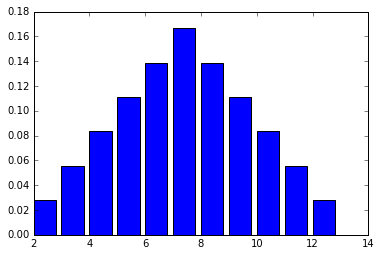

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
x = np.fromiter(iter(X.keys()), dtype=int)
y = np.fromiter(iter(X.values()), dtype=float)
plt.bar(x,y);